In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [6]:
X,y = make_classification(n_samples = 100, n_features=2, n_informative=1, n_redundant=0,
                          n_classes = 2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

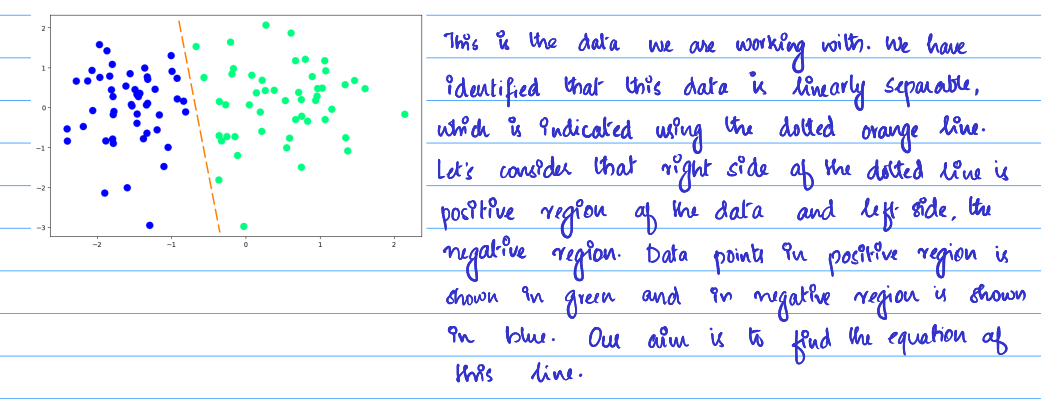

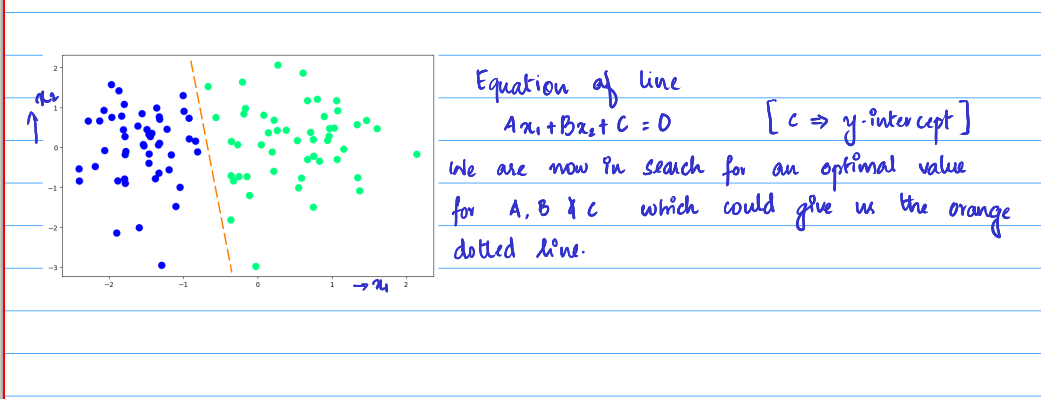

### PERCEPTRON TRICK INTUITION

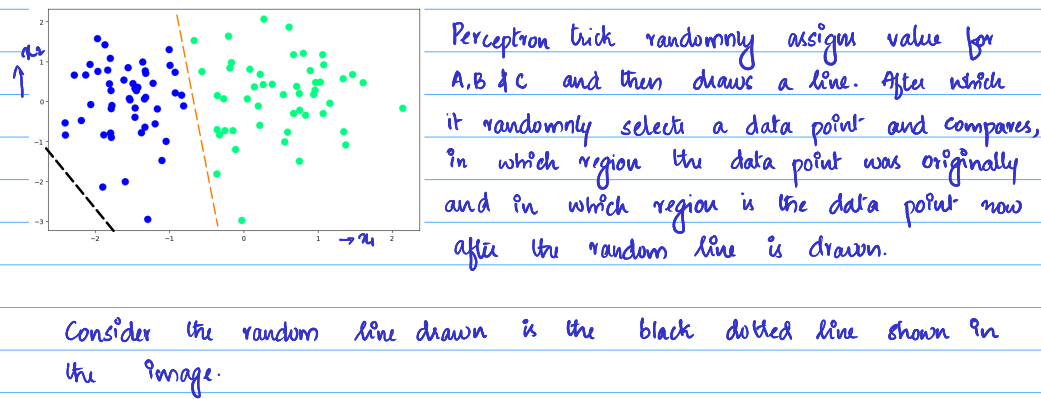

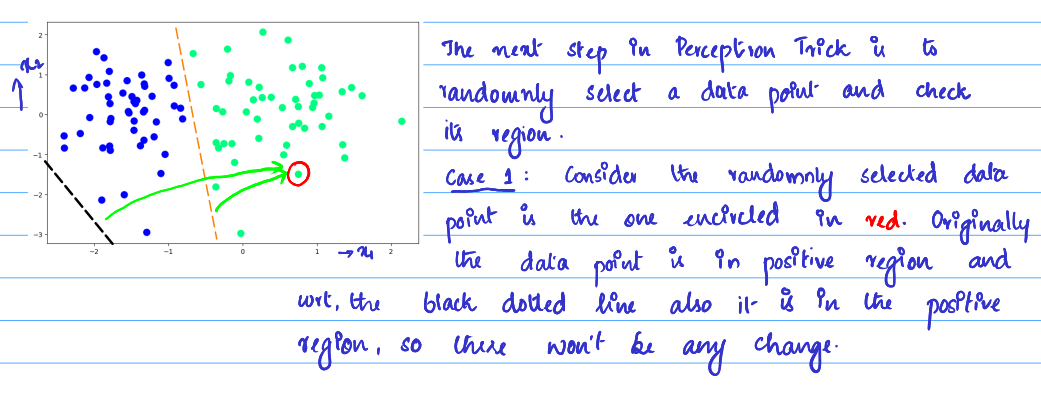

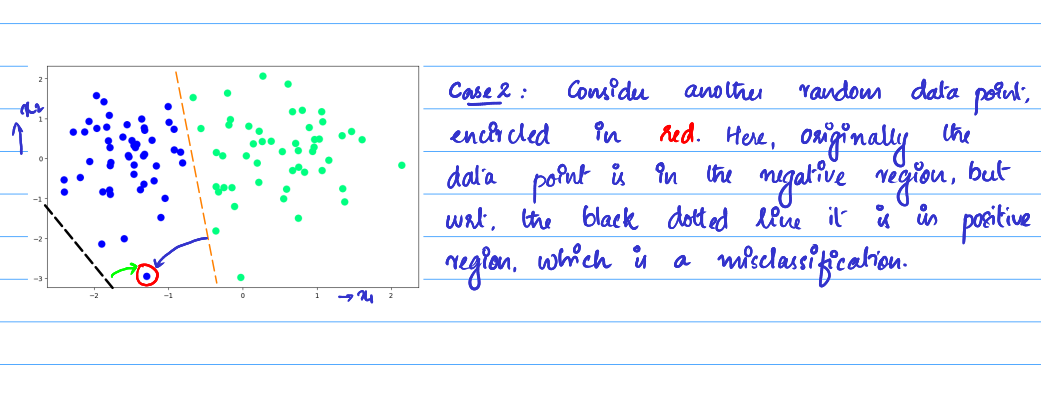

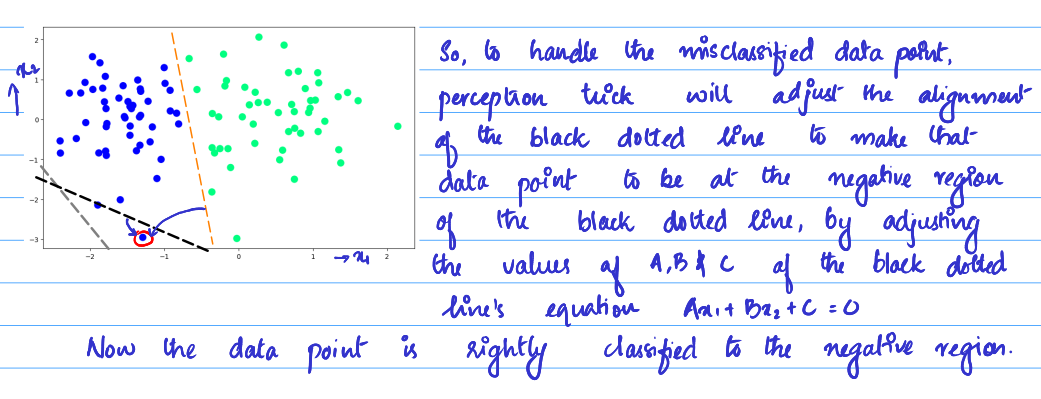

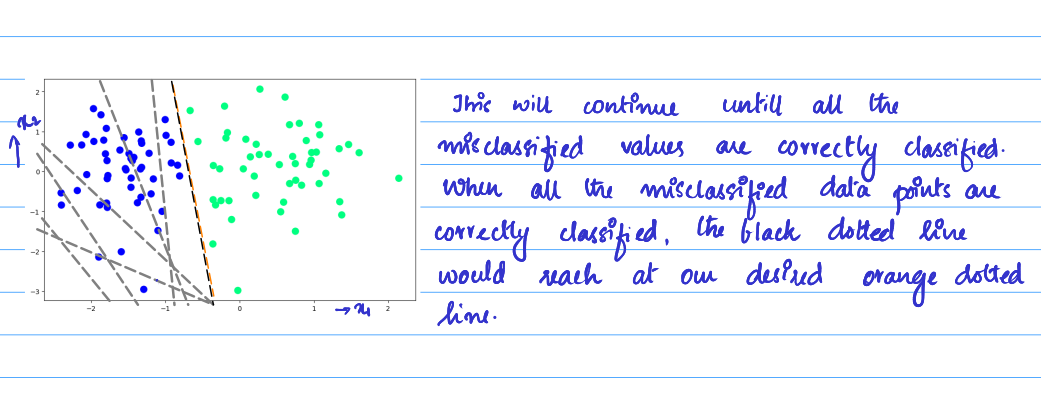

### HOW TO DETERMINE POSITIVE AND NEGATIVE REGION OF A LINE

###### The positive and negative region of a line is determined by solving the line's equation.
###### Consider a line, with equation 3x + 4y +5 = 0.
###### When you solve this equation, 3x + 4y + 5, by substituting x and y with some values, if the solution is greater that zero, then we can say that the point (x,y) lies in the positive region of the line. If the solution is less than zero, then we can say that the point (x,y) lies in the negative region of the line.
###### If the solution is zero, then we can say the point (x,y) is on the line

### HOW DOES THE LINE CHANGES WRT TO CHANGE IN A,B & C VALUES?

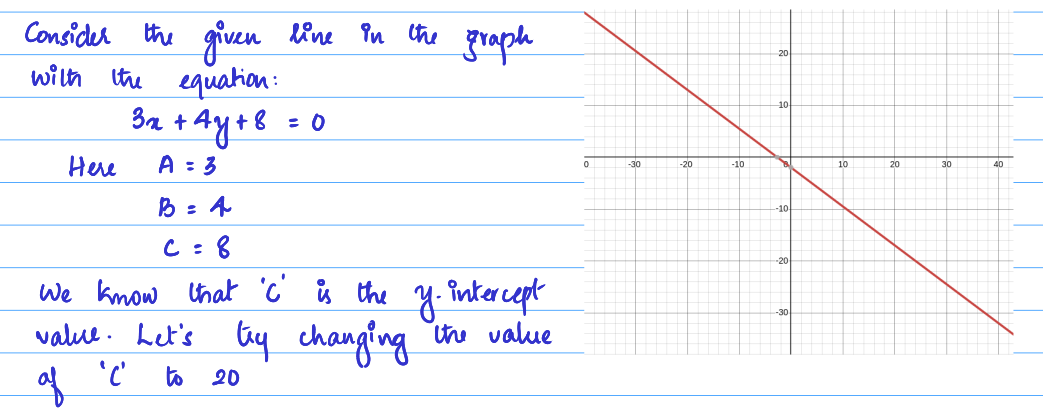

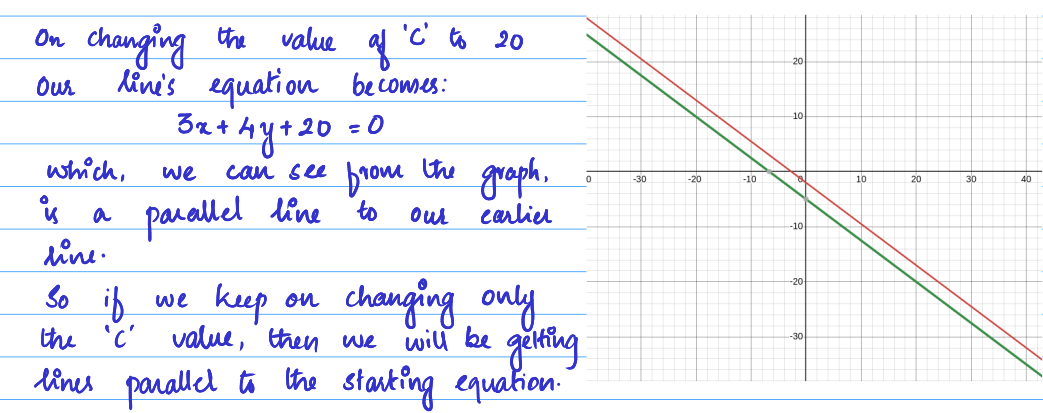

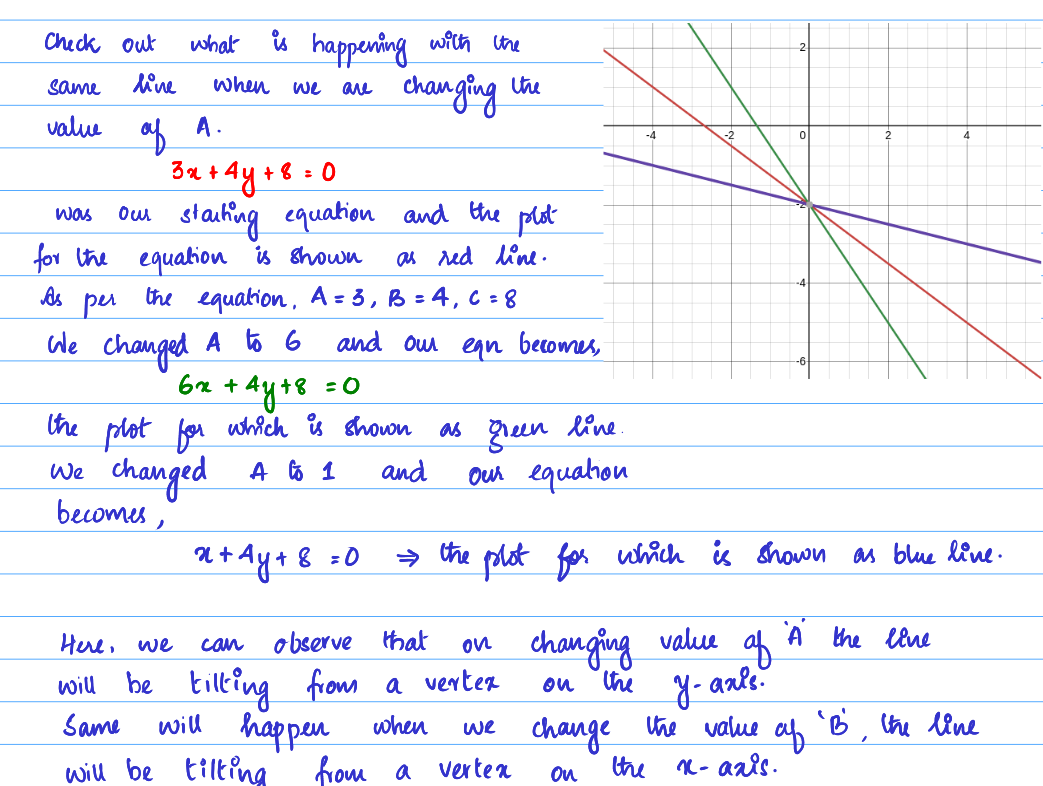

##### This is how the position of the line will be changing if we change only one parameter from  A,B,C. If we change all the three parameters simultaneously then, the entire line's position will get transformed, which is how the perceptron trick is adjusting the line.

### How does the Transformation of line happens in Perceptron Trick?

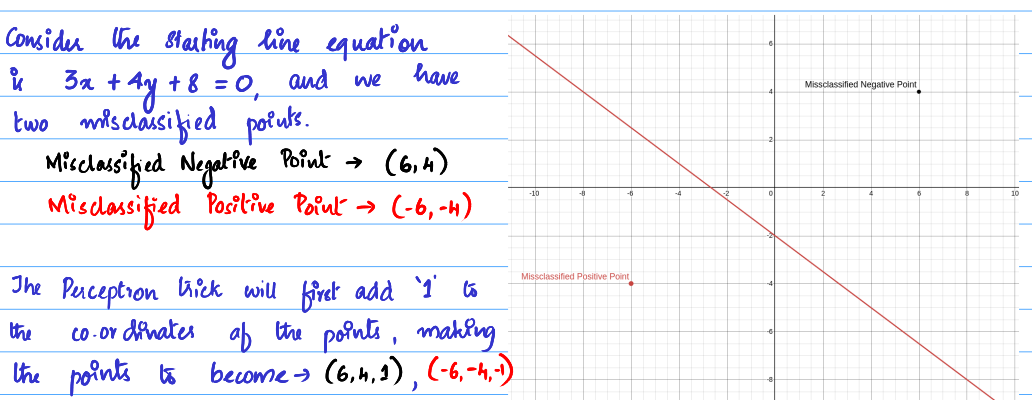

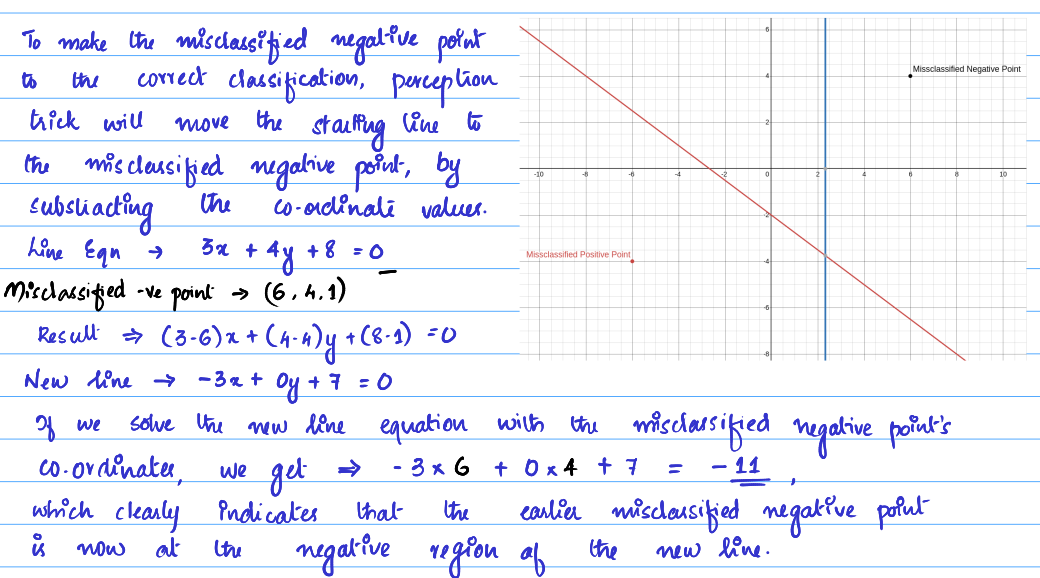

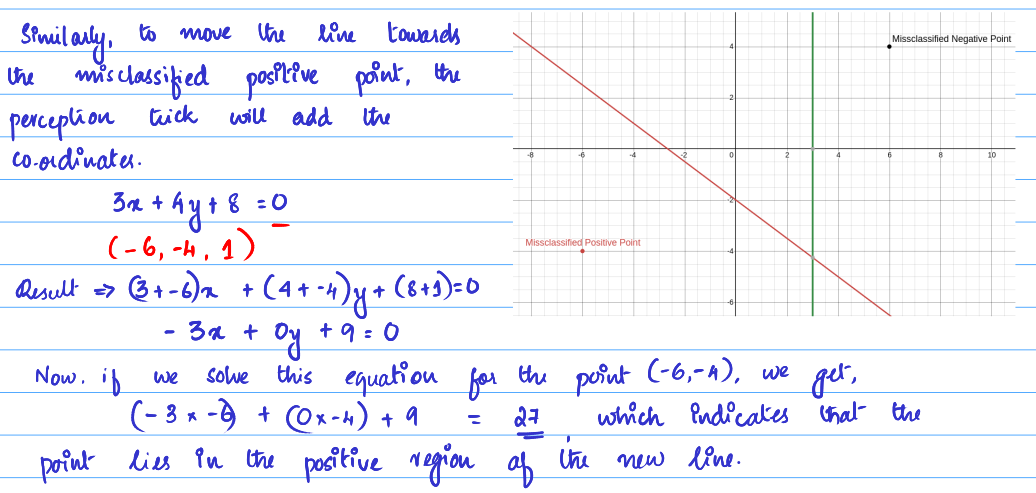

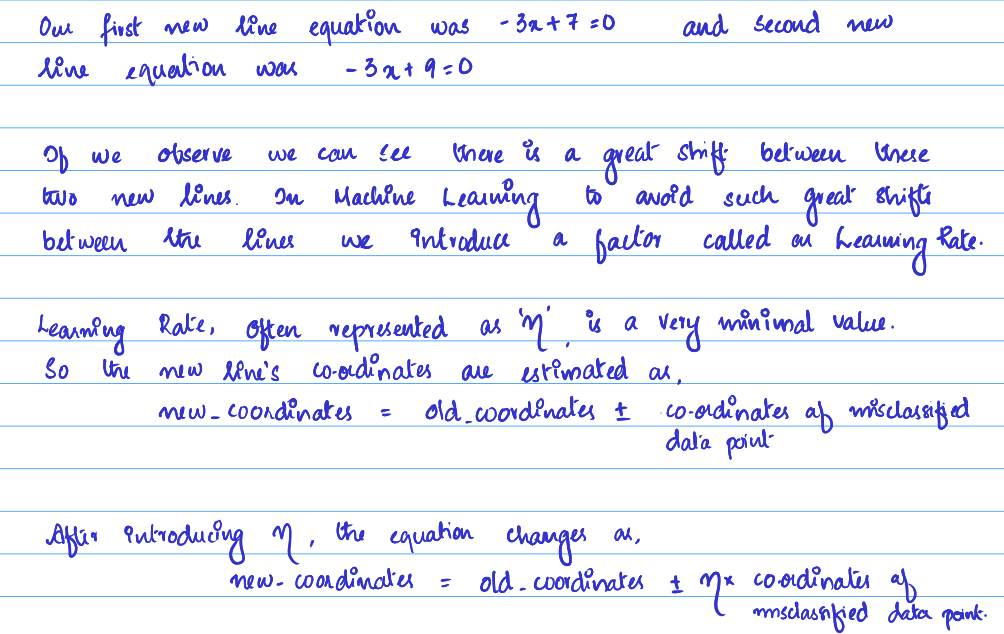

### PERCEPTRON TRICK ALGORITHM

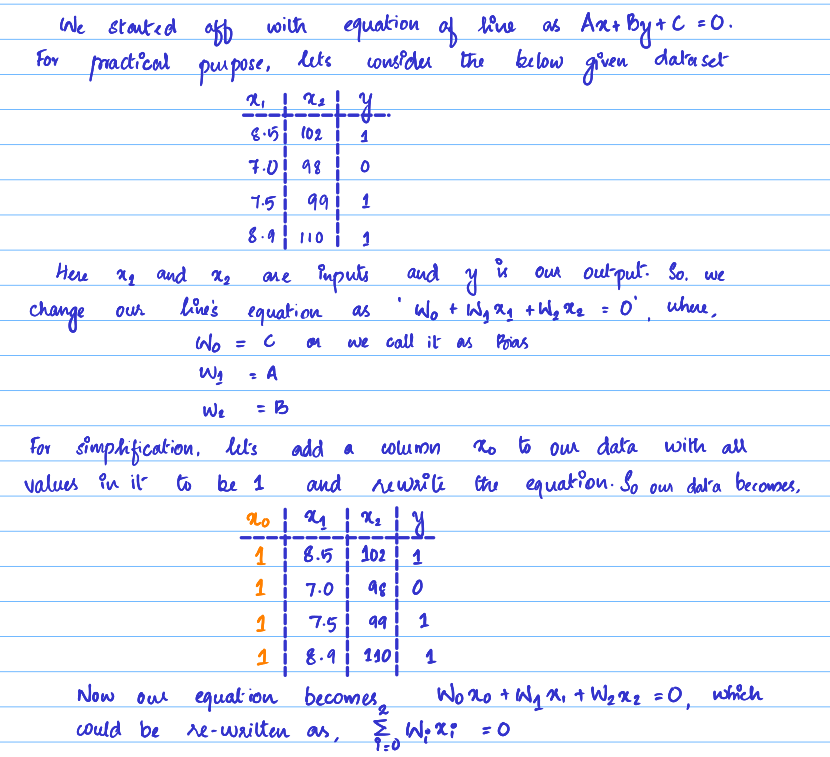

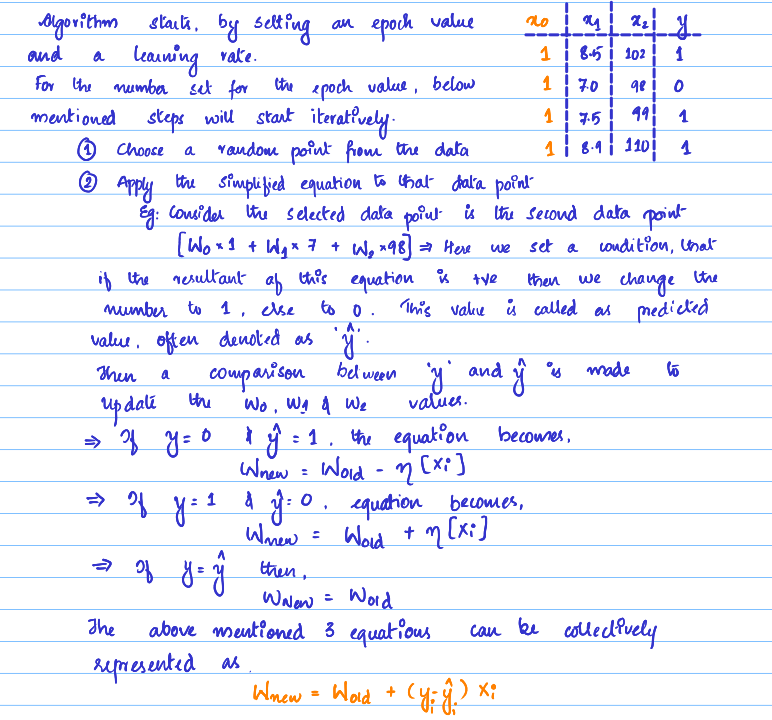

### Let's implement this Algorithm in code

##### 1. Function to convert a number to 1 if the number is positive, else to 0

In [8]:
def step(number):
    return 1 if number > 0 else 0

##### 2. Function to implement Perceptron Trick Algorithm

In [12]:
def perceptron_trick(X,y):
    
    #Step1: Add a new column to the data with all values in it to be 1.
    
    X = np.insert(X,0,1,axis=1)
    
    #Step2: Random initialization of Weights. For convenience we are initializing all weights to 1
    
    weights = np.ones(X.shape[1])
    
    #Step3: Initialize the learning rate
    
    learning_rate = 0.1
    
    #Step4: Initialize the number of epochs
    
    epochs = 1000
    
    #Step5: Start the iterative process
    
    for i in range(epochs):
        j = np.random.randint(1,100) #to randomly select a number between 1-100. since we have only 100 datapoints
        y_hat = step(np.dot(X[j],weights)) #predicted value
        weights = weights + learning_rate*(y[j]-y_hat)* X[j] #weight updation algorithm
        
    
    return weights[0], weights[1:]

In [13]:
intercept, coefficients = perceptron_trick(X,y)

In [14]:
print("The intercept value is:", intercept)
print("The coefficients values are:", coefficients)

The intercept value is: 0.9
The coefficients values are: [1.29644664 0.21273406]


##### From these intercept and coefficients value, we need to get the line's equation in y=mx+b format
##### where m is slope calculated as, m = - (coefficient_1/coefficient_2)
##### and b is intercept calculated as, b = - (intercept/coefficient_2)

In [15]:
m = -(coefficients[0]/coefficients[1])
b = -(intercept/coefficients[1])

#### Now let's plot the line in our data

In [16]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

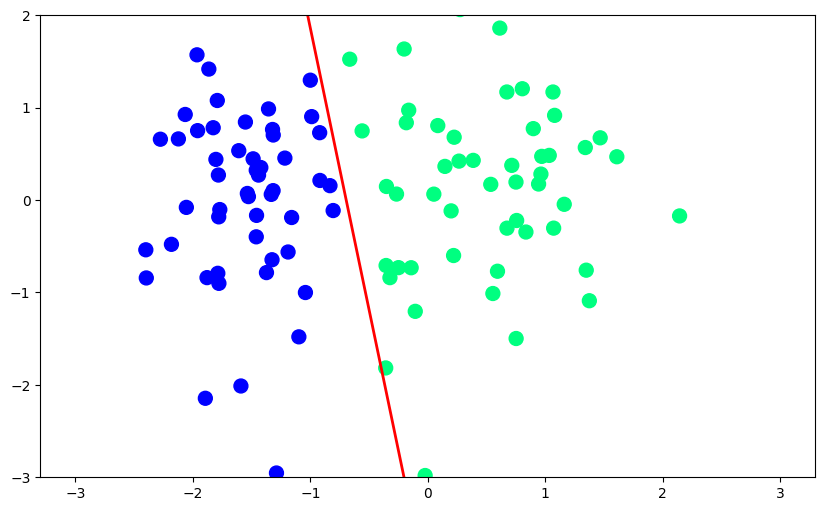

In [18]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

#### From the above plot we can see that the Perceptron trick has correctly calssified our datapoints